In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['figure.figsize'] = [10, 6]

import utils
from add_fourier import get_fourier_fn

In [6]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
    return df

[-2.91533791e-07  4.94495275e-02] Charon F435W
[-1.87143247e-06  2.28753055e-01] Pluto F435W
[0.00476426 0.00401127] Charon F555W
[0.03115367 0.0185646 ] Pluto F555W


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


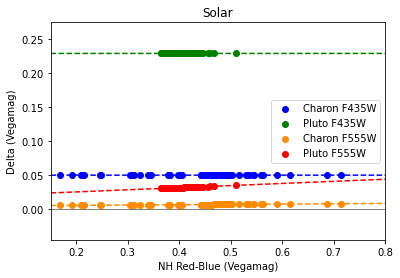

[-5.53441286e-08 -1.51566324e-01] Charon F435W
[-1.57911236e-06  2.77372395e-02] Pluto F435W
[-0.06654539 -0.08566933] Charon F555W
[-0.03688897 -0.08888751] Pluto F555W


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


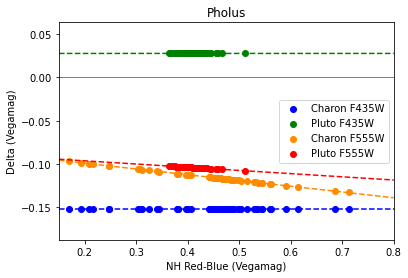

In [7]:
def col():
    colors = ['blue', 'green', 'darkorange', 'red']
    i = 0
    while True:
        yield colors[i%len(colors)]
        i += 1

getcol = col()

def show_spec_diff(data_file, spec):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    color = next(getcol)

    df = read_file(f"output/{data_file}.json")
    spec_df = read_file(f"output/{data_file}_{spec}.json")

    plot_x = df.converted_vegamag_NH_BLUE - df.converted_vegamag_NH_RED # B-V on x axis
    plot_y = df.multi_vegamag - spec_df.multi_vegamag # Delta on y axis
    
    plt.scatter(
        plot_x, plot_y,
        marker='o', c=color,
        label=f"{target} {bandpass}"
    )
    
    # Fits
    fit = np.polyfit(plot_x, plot_y, 1)
    print(fit, target, bandpass)
    x = [0.15, 0.8]
    plt.plot(x, np.poly1d(fit)(x), '--', c=color)
    

def plt_save(spec):
    # line in middle of figure to emphasize importance of y=0
    plt.axhline(0, c='black', lw=0.5)
    
    plt.title(f"{spec.capitalize()}")
    plt.xlabel("NH Red-Blue (Vegamag)")
    plt.ylabel("Delta (Vegamag)")
    plt.gca().set_ymargin(0.2)
    plt.gca().set_xmargin(0.0)
    plt.legend(loc='center right')
    figname = f"{spec}_diff.eps"
    plt.savefig(f"figures/{figname}", bbox_inches='tight')
    plt.show()

    
show_spec_diff("charon_435", "solar")
show_spec_diff("pluto_435", "solar")
show_spec_diff("charon_555", "solar")
show_spec_diff("pluto_555", "solar")
plt_save("solar")
show_spec_diff("charon_435", "pholus")
show_spec_diff("pluto_435", "pholus")
show_spec_diff("charon_555", "pholus")
show_spec_diff("pluto_555", "pholus")
plt_save("pholus")